**Mean Reverting Process Assignment**

**Execute the following cell.**

In [1]:
import numpy as np

**Stochastic differential equations (SDE's)**

An accomanying pdf file introducing SDE's has been posted in Canvas (see the Notes on Special Topics Module).

For our purposes, a stochastic differential equation is an expression of the form

$$
(*) ~~~~~~dX_t = f(t,X_t) dt + g(t,X_t) dB_t
$$

which describes how a random function $X_t$ evolves in time. Here $B_t$ represents a standard Brownian motion process, and we can interpret this equation as saying that, approximately speaking, in an infinitesimal time increment $\Delta$ the change in $X_t$ from time $t$ to time $t+\Delta$ is given by

$$
X_{t+\Delta} - X_t \approx f(t,X_t) \Delta + g(t,X_t) (B_{t+\Delta} - B_t)
$$

and given how Brownian motion paths, we can write the right hand side as 

$$
f(t,X_t) \Delta + g(t,X_t) \delta
$$

where $\delta \sim N(0,\Delta)$ or equivalently $\delta = \sqrt{\Delta} Z$ where $Z \sim N(0,1).$

We see that this change has

- a *deterministic/drift* component $f(t,X_t) dt$ which can be interpreted as saying that the rate of change per unit time of this component depends via a function $f$ on the current time $t$ and current position $X_t,$ and

- a *stochastic/volatility* component $g(t,X_t) \delta$ which is normally distributed with mean 0 and variance $\Delta g(t,X_t)^2$ so is dependent via a function $g$ on the current time $t$ and current position $X_t.$

So, here $f$ and $g$ are real-valued functions of two variables (time and position).

**Generating Realizations (first method)**

Given these two functions (assuming they satisfy certain technical properties not mentioned here) and a starting position $X_0$ of the process at time $t=0$ we can *generate* approximate realizations of the process $X$ at times $0,\Delta,2\Delta,3\Delta,\ldots,$ using the following iterative procedure:

$$
X_\Delta = X_0 + f(0,X_0)\Delta + g(0,X_0)\sqrt{\Delta} \delta_0
$$

$$
X_{2\Delta} = X_{\Delta}+ f(\Delta,X_{\Delta})\Delta + g(\Delta,X_{\Delta})\sqrt{\Delta} \delta_1
$$

$$
X_{3\Delta} = X_{2\Delta}+ f(2\Delta,X_{2\Delta})\Delta + g(2\Delta,X_{2\Delta})\sqrt{\Delta} \delta_2
$$

$$
\vdots
$$

where $\delta_0,\delta_1,\delta_2,\ldots$ is a sequence of (pseudo-random) iid $N(0,1)$ random variables.
Observe that we can't calculate $X_{j\Delta}$ using this iterative procedure until we know $X_{(j-1)\Delta}.$


**Examples**

**Brownian motion with drift**

Here 

$$
dX_t = \mu dt + \sigma dB_t
$$

so $f$ and $g$ are constant functions $f(t,x) \equiv \mu$ and $g(t,x) \equiv \sigma.$

**Geometric Brownian motion**

When we first introduced this process we wrote it as

$$
X_t = e^{\mu t + \sigma B_t}
$$

but thanks to Ito's lemma we can express this process using the SDE in the form described above

$$
dX_t = \mu X_t  dt + \sigma X_t dB_t
$$

so here 

$$f(t,x)= \mu x$$ 

(not dependent on $t$) and 

$$g(t,x) = \sigma x$$ 

(also not dependent on $t$).


**Mean-Reverting Process (MRP)**

An accompanying pdf file devoted to MRP's has been posted in Canvas.

In this homework assignment we'll consider this important and useful example. This is the so-called mean-reverting or Ornstein-Uhlenbeck process, defined by the SDE:

$$
(**)~~~~~~~~~~~~~dX_t = \theta(\mu - X_t)dt + \sigma dB_t
$$

where $\theta,\sigma>0$ and $\mu \in \mathbb{R}.$
So here we see that this is also a special case of the general form $(*)$ with

$$
f(t,x) = \theta(\mu - x)
$$

and 

$$
g(t,x)\equiv \sigma
$$


(again, neither function depending on time $t.$)

**Generating Realizations for an MRP (second method)**

As described in the above-mentioned  MRP notes, the MRP is special in that there is an iterative way to generate a realization of the process at specific time points $t_0 < t_1 < ... < t_k$ assuming we know the position at time $t_0$ to be $X_0$ (the time points do not have to be equally spaced!). This comes as another application of Ito's lemma.

Once we know the position $X_t$ at times $t=t_0,\ldots,t_{i-1}$ we can 
use the fact that the conditional distribution of $X_{t_i}$ given $X_{t_0},\ldots,X_{t_{i-1}}$ has a normal distribution with mean

$$
e^{-\theta \Delta t_i} X_{t_{i-1}} + (1-e^{-\theta \Delta t_i})\mu
$$

and variance

$$
v = \sigma^2(1-e^{-2\theta \Delta t_i})/(2\theta)
$$

where $\Delta t_i = t_i - t_{i-1}.$

It is worth mentioning that 

- the fact that the distribution conditioned on past times only depends on the most recent time makes this a *Markov process,* or we say that the process is *Markovian*, and
- the conditional mean of the future position $X_{t_i}$ is a *convex combination* of the current position and the  value $\mu$ i.e. we can write this conditional mean as $\lambda X_{t_{i-1}}+(1-\lambda)\mu$ where $\lambda \in (0,1),$ and $\lambda$ gets closer to 0 the for larger and larger values of $\Delta t_i,$ so in this sense the process has a tendency to *revert back to the mean* $\mu.$

**Problem 1 (20 points) - Generating MRP realizations**

Write a program called function called **MRPRealization** that takes as inputs the following:

- **X0** = a starting value for the process at time T[0]=0 (T defined below)
- **theta**
- **mu**
- **sigma**
- **T** a numpy 1-d array of increasing sequence of times at 
which to generate process values (with T[0]=0)

and outputs two 1-d numpy arrays 

- **T** the input array T (with T[0]=0) i.e. the same as the input array
- **X** the values of $X$ for the realization at those times in T.

**Important:** 

- You should try to make your code as efficient as possible. 
- Your code should use the second method described above.

Make your function **fully self-contained.** You should not use functions except those found in the numpy package.

Use the following cell for your code.

In [2]:
# Code cell for Problem 1 - do not modify or delete this line
import numpy as np
def MRPRealization(X0,theta,mu,sigma,T):
    X = [X0]
    for i in range(1, len(T)):
        dt = T[i] - T[i - 1]
        mean = np.exp(-theta * dt) * X[-1] + (1 - np.exp(-theta * dt)) * mu
        var = (sigma**2 * (1 - np.exp(-2 * theta * dt))) / (2 * theta)
        Xdot = np.random.normal(mean, np.sqrt(var))
        X.append(Xdot)
    return np.array(T), np.array(X)

If your code works properly, you should be able to execute the following code and visualize 5 different realizations of the process with parameters:

- X0=100
- theta=.8
- mu=80
- sigma=1
- T a time vector of length 10,001 taking values 0,$\Delta,$ $2\Delta,\ldots 10000\Delta=25$



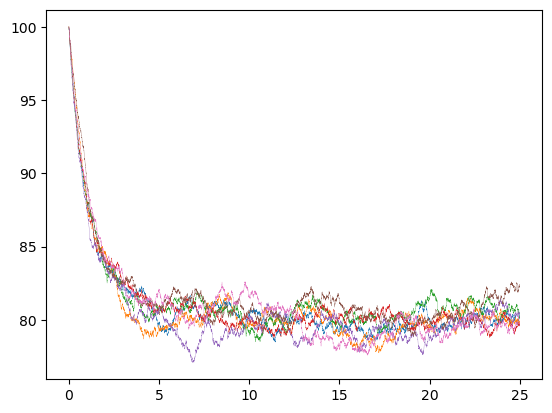

In [3]:
# First plot cell for Problem 1 - do not modify or delete this line.
# Execute this cell after running the Code cell for Problem 1
import matplotlib.pyplot as plt
theta=.8
mu=80
T,X1=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X2=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X3=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X4=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X5=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X6=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X7=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))

lw=.2
plt.plot(T,X1,linewidth=lw)
plt.plot(T,X2,linewidth=lw)
plt.plot(T,X3,linewidth=lw)
plt.plot(T,X4,linewidth=lw)
plt.plot(T,X5,linewidth=lw)
plt.plot(T,X6,linewidth=lw)
plt.plot(T,X7,linewidth=lw)


And you should be able to execute the following cell and visualize the effect of making the parameter $\theta$ smaller.
You should observe that the time to reach the value $\mu = 80$ tends to increase.

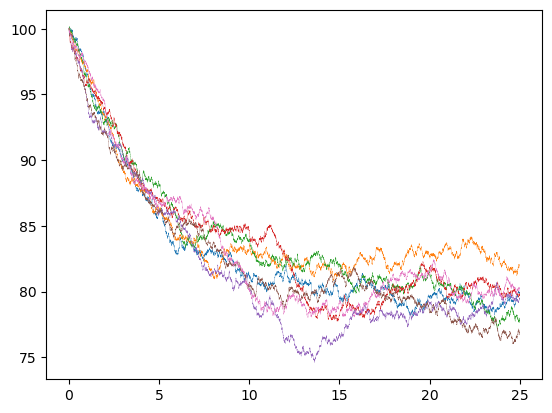

In [4]:
# Second plot cell for Problem 1 - do not modify or delete this line.
# Execute this cell after running the Code cell for Problem 1
import matplotlib.pyplot as plt
theta=.2
mu=80
T,X1=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X2=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X3=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X4=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X5=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X6=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))
T,X7=MRPRealization(100,theta=theta,mu=mu,sigma=1,T=np.linspace(0,25,10001))

lw=.2
plt.plot(T,X1,linewidth=lw)
plt.plot(T,X2,linewidth=lw)
plt.plot(T,X3,linewidth=lw)
plt.plot(T,X4,linewidth=lw)
plt.plot(T,X5,linewidth=lw)
plt.plot(T,X6,linewidth=lw)
plt.plot(T,X7,linewidth=lw)


We're interested in time intervals in which an MRP remains above some threshold $\tau,$ and we might ask questions such as

- what is expected value of the longest time interval in which the threshold is exceeded between time 0 and $T,$
- how likely are we to see a time interval of length at least some value $v$ between time 0 and $T$ 

Before we do some simulations we'll need a couple of functions.

**Problem 2 (20 points)**

In a sequence $x_0,x_1,\ldots,x_n$ of 0's and 1's, a run of 1's of length $j$ is a subsequence $x_i,x_{i+1},\ldots,x_{i+j-1}$ with all values equal to 1.

Write a function called **longest_run_of_ones** that takes as input 

- a list Y or 1-d numpy array Y of positive length consisting only of 0's and 1's.

and that outputs 

- N = the number of 1's in the longest run of 1's in Y
- P = the starting position where the first occurence of the longest run starts

For example

- in the list [0,1,0,1,1,0,1,1,1,0,1,0,1,1,1] the longest run of 1's is 3 and the starting position of the first run of size 3 is 6.
- in the list [0,0,1,0,1] the longest run of 1's is 1 and the starting position of the first run of 1's is 2
- in the list [1,1,1,1,1] the longest run of 1's is 5 and its starting position is 0.

If there are no runs in Y, your code should return 0,-1.

Use the following cell for your code. Your code should be completely self-contained.

In [5]:
# Code cell for Problem 2 - do not modify or remove this line
def longest_run_of_ones(Y):
    max_run = 0
    curr_run = 0
    curr_i = -1
    max_i = -1
    for i, y in enumerate(Y):
        if y == 1:
            if curr_run == 0:
                curr_i = i
            curr_run += 1
            if curr_run > max_run:
                max_run = max(max_run, curr_run)
                max_i = max(max_i, curr_i)
        else:
            curr_run = 0
            curr_i = -1
    return max_run, max_i

In [6]:
# Test cell1 for Problem 2- do not modify this cell
# Do execute it
print(longest_run_of_ones([0,1,0,1,1,0,1,1,1,0,1,0,1,1,1]))
print(longest_run_of_ones([0,0,1,0,1]))
print(longest_run_of_ones([1,1,1,1,1]))
print(longest_run_of_ones([0,1,0,1,1,0,0,0,1,1,1,1,1]))
print(longest_run_of_ones([0,0,0,0,0]))


(3, 6)
(1, 2)
(5, 0)
(5, 8)
(0, -1)


In [7]:
# Test cell2 for Problem 2 - do not modify this cell
# Do execute it
np.random.seed(1234)
L=np.random.choice([0,1],size=10000)
N,P=longest_run_of_ones(L)
print(N)
print(L[(P-1):(P+N+1)])

15
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


**Problem 3 (10 points)**

Write a function called **longest_interval_above_threshold** that takes as inputs MRP parameters

- X0
- theta 
- mu 
- sigma  
- T (array of times)

and a threshold

- tau

generates a realization of the MRP with the given MRP parameters, and returns as output 

- the duration of the longest time interval in which the threshold tau is exceeded.

**Notes:** 

- If the threshold is exceeded at times $T[i],T[i+1],...,T[i+j-1]$ and not at times $T[i-1]$ and $T[i+j]$ you should take the length of the corresponding time interval to be $T[i+j-1]-T[i].$

- If the threshold is exceed at times $T[i],T[i+1],...,T[N-1]$ where $N$ is the length of $T$ then you should take the length of the corresponing time interval to be $T[N-1]-T[i].$

- Your code should use the functions in Problems 1 and 2.

Use the following cell for your code.

In [8]:
# Code cell for Problem 3 - do not modify or delete this line
def duration_of_longest_interval_above_threshold(X0,theta,mu,sigma,T,tau):
    X_array = MRPRealization(X0,theta,mu,sigma,T)[1]
    seq = np.where(X_array > tau, 1, 0)
    max_run, max_i = longest_run_of_ones(seq)
    if max_i + max_run == len(seq):
        return T[-1] - T[max_i]
    elif max_i + max_run < len(seq):
        return T[max_i + max_run - 1] - T[max_i]
    return None

**Problem 4 (5 points)**

Suppose an MRP has the parameter values

- X0 = 80
- theta = .2
- mu = 80
- sigma = 1

use your code in Problem 3 to estimate the expected length of the longest interval above the threshold of 81 that occurs during
the time period $[0,25].$

To estimate this, use 1,000 trials. In each trial, take your time vector to consist ot 10,000 equally spaced times between 0 and 25.

In the code cell, assign a values to the following variables:

- **mu4** = estimate of $\mu,$ the expected duration of the longest time interval

- **sd4** = estimated standard deviation of the duration of the longest time interval

- **muL** = lower 95% confidence interval for the expected duration

- **muU** = upper 95% confidence interval for the expected duration 

In [9]:
# Code cell for Problem 4 - do not modify or delete this line
durations = [duration_of_longest_interval_above_threshold(80, .2, 80, 1, np.linspace(0, 25, 10000), 81) for i in range(1000)]
mu4 = np.mean(durations)
sd4 = np.std(durations)
muL4 = mu4 - 1.96 * sd4 / np.sqrt(1000)
muU4 = mu4 + 1.96 * sd4 / np.sqrt(1000)

In [10]:
# Print cell for Problem 4 - do not modify this cell
# Do execute it
print(np.round(mu4,3))
print(np.round(sd4,3))
print(np.round(muL4,3))
print(np.round(muU4,3))

2.848
2.8
2.675
3.022


**Problem 5 (5 points)**

Repeat what you did in Problem 4 but this time take the theta parameter to be .1 and leave the rest of the parameters unchanged.

In the code cell, assign a values to the following variables:

- **mu5** = estimate of expected duration of the longest time interval

- **sd5** = estimated standard deviation of the duration of the longest time interval

- **mu5L** = lower 95% confidence interval for the expected duration

- **mu5U** = upper 95% confidence interval for the expected duration 


In [11]:
# Code cell for Problem 5 - do not modify or delete this line
durations = [duration_of_longest_interval_above_threshold(80, .1, 80, 1, np.linspace(0, 25, 10000), 81) for i in range(1000)]
mu5 = np.mean(durations)
sd5 = np.std(durations)
mu5L = mu5 - 1.96 * sd5 /np.sqrt(1000)
mu5U = mu5 + 1.96 * sd5 /np.sqrt(1000)

In [12]:
# Print cell for Problem 5 - do not modify this cell
# Do execute it
print(np.round(mu5,3))
print(np.round(sd5,3))
print(np.round(mu5L,3))
print(np.round(mu5U,3))

4.413
4.818
4.115
4.712


Do you understand how, qualitativelty, the answers in Problem 4 and Problem 5 make sense?

**Problem 6 (10 points)**

Write a function called **interval_above_threshold** that takes as inputs MRP parameters

- X0
- theta 
- mu 
- sigma  
- T

and in addition

- tau = a threshold
- dur = a time duration

generates a realization of the MRP with the given MRP parameters, and returns as output a Boolean value

- True - if there is a time interval (based on times in time vector T) whose duration is at least dur in which the threshold tau is always exceeded
- False - otherwise

Use the following cell for your code. 

In [13]:
# Code cell for Problem 6 - do not modify or delete this line
def interval_above_threshold(X0, theta, mu, sigma, T, tau, dur):
    time_array, X_array = MRPRealization(X0, theta, mu, sigma, T)
    curr_duration = 0
    for i in range(1, len(X_array)):
        if X_array[i] > tau:
            curr_duration += time_array[i] - time_array[i-1]
            if curr_duration >= dur:
                return True
        else:
            curr_duration = 0
    return False

**Problem 7 (5 points)**

Suppose an MRP has the parameter values

- X0 = 80
- theta = .2
- mu = 80
- sigma = 1

use your code in Problem 6 to estimate the probability that there is an interval above the threshold of 81 whose duration is at least 2. that occurs during
the time period $[0,25]$

To estimate this, use 1,000 trials. In each trial, take your time vector to consist ot 10,000 equally spaced times between 0 and 25.

In the code cell, assign a values to the following variables:

- **Pest7** = estimated probability 

- **PL7** = lower 95% confidence interval for the probability 

- **PU7** = upper 95% confidence interval for the probability  

In [14]:
# Code cell for Problem 7 - do not modify or delete this line
successes = np.sum([interval_above_threshold(80, .2, 80, 1, np.linspace(0, 25, 10000), 81, 2) for i in range(1000)])
Pest7 = successes / 1000
PL7 = Pest7 - 1.96 * np.sqrt(Pest7 * (1 - Pest7) / 1000)
PU7 = Pest7 + 1.96 * np.sqrt(Pest7 * (1 - Pest7) / 1000)

In [15]:
# Print cell for Problem 7 - do not modify this cell
# Do execute it
print(np.round(Pest7,3))
print(np.round(PL7,3))
print(np.round(PU7,3))

0.511
0.48
0.542


**Problem 8 (5 points)**

Repeat what you did in Problem 7 but this time take theta=.1

In the following code cell, assign a values to the following variables:

- **Pest8** = estimated probability 

- **PL8** = lower 95% confidence interval for the probability 

- **PU8** = upper 95% confidence interval for the probability  

In [16]:
# Code cell for Problem 8 - do not modify or delete this line
successes = np.sum([interval_above_threshold(80, .1, 80, 1, np.linspace(0, 25, 10000), 81, 2) for i in range(1000)])
Pest8 = successes / 1000
PL8 = Pest8 - 1.96 * np.sqrt(Pest8 * (1 - Pest8) / 1000)
PU8 = Pest8 + 1.96 * np.sqrt(Pest8 * (1 - Pest8) / 1000)

In [17]:
# Print cell for Problem 8 - do not modify this cell
# Do execute it
print(np.round(Pest8,3))
print(np.round(PL8,3))
print(np.round(PU8,3))

0.566
0.535
0.597


Again, do you understand why there is a difference, qualitatively, between your answers in Problems 7 and 8?

**Make sure that**

- all cells run without error
- you save your notebook